In [40]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 50)


In [2]:
predictors = ['SAL_TA', 'ROE', 'ROA_NETTO', 'TL_TA', 'CASH_TA', 'ROS', 'NCL_TA', 'TL_SAL', 'LABOR_PRODUCTIVITY', 'SOCLIAB_SAL']

print(len(predictors))

10


In [3]:
financial_ratios_table_raw = pd.read_csv('../../DATA/FINAL/training_data.csv')

financial_ratios_table_raw = financial_ratios_table_raw.query('sknace_division == "G" and sal_class in ["2. Malý", "3. Stredný"]')

display(financial_ratios_table_raw.shape[0])

C:\Users\matus.rohal\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3433: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


22148

In [4]:
def combined_issue_2y_off(row):
    if row.DPHZ_vat_registration_cancelled_2y_off == 1: return 1
    if row.RUZ_cancelled_2y_off == 1: return 1
    if row.RU_konkurz_2y_off == 1: return 1
    if row.RU_ostatne_konania_2y_off == 1: return 1
    return 0


def combined_issue_1y_off(row):
    if row.DPHZ_vat_registration_cancelled_1y_off == 1: return 1
    if row.RUZ_cancelled_1y_off == 1: return 1
    if row.RU_konkurz_1y_off == 1: return 1
    if row.RU_ostatne_konania_1y_off == 1: return 1
    return 0


financial_ratios_table_raw['direct_criterion_2y_off'] = financial_ratios_table_raw.apply(combined_issue_2y_off, axis = 1)
financial_ratios_table_raw['direct_criterion_1y_off'] = financial_ratios_table_raw.apply(combined_issue_1y_off, axis = 1)

In [5]:
financial_ratios_table_raw['year'].value_counts()

2018    2873
2021    2870
2019    2847
2015    2776
2017    2767
2016    2745
2020    2739
2014    2531
Name: year, dtype: int64

In [6]:
def get_sample_sizes(data, row_label, column_label):
    samples_df = data.groupby([row_label, column_label])['financial_statement_id'].nunique().to_frame('count').reset_index()
    wide_df = pd.pivot_table(samples_df, index = row_label, columns=column_label, fill_value=0)
    return wide_df

In [7]:
previous_year_data = financial_ratios_table_raw[['entity_ico', 'year'] + predictors]
previous_year_data.columns = ['entity_ico', 'year'] + [col + '_previous' for col in predictors]
previous_year_data['year'] += 1

financial_ratios_table_raw = financial_ratios_table_raw.merge(previous_year_data, on = ['year', 'entity_ico'], how = 'left')


C:\Users\matus.rohal\AppData\Local\Temp\ipykernel_4412\247793335.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  previous_year_data['year'] += 1


In [25]:
sample = financial_ratios_table_raw.query('SAL_TA_previous == SAL_TA_previous and year == 2017')
sample

,financial_report_id,financial_statement_id,financial_report_order_number,entity_id,approved_date,entity_ico,year,month,financial_report_template_id,entity_name,establishment_date,cancellation_date,sknace_code,entity_state,period_length,financial_report_id.1,financial_report_template_id.1,total_assets,non_current_assets,intangible_assets,total_non_current_tangible_assets,land_and_buildings,separate_movable_assets_and_sets_of_movable_assets,other_long_term_tangible_assets,adjustment_item_for_acquired_assets,total_long_term_financial_assets,bank_balances_with_maturity_longer_than_one_year,current_assets,inventories,non_current_claims,current_claims,trade_receivables,social_security_tax_receivables_and_grants,financial_assets,other_financial_accounts,cash_and_bank_balances,total_owners_equity_and_liabilities,owners_equity,share_capital,share_capital_and_changes_in_share_capital,claims_for_subscribed_owners_equity,capital_funds,valuation_differences,undivided_profit_or_unpaid_loss_from_previous_years,profit_for_the_reporting_period_after_tax,liabilities,long_term_liabilities_excluding_reserves_and_loans,long_term_reserves,long_term_bank_loans,total_short_term_liabilities_excluding_reserves_loans_and_advances,...,CL_TA,NCL_TA,EQ_TL,EQ_TA,EBIT_INT,CL_CC,ROE,EAT_TA,ROA_BRUTTO,CF_TA,CF_SAL,ROS,EAT_YIE,ROI,ROA_NETTO,LABOR_PRODUCTIVITY,SOCLIAB_SAL,sknace_division_name,sknace_division,sknace_subcategory,DPHZ_vat_registration_cancelled,DPHZ_vat_registration_cancelled_1y_off,DPHZ_vat_registration_cancelled_2y_off,RUZ_indirect_criterion,RUZ_indirect_criterion_1y_off,RUZ_indirect_criterion_2y_off,RU_konkurz,RU_konkurz_1y_off,RU_konkurz_2y_off,RU_ostatne_konania,RU_ostatne_konania_1y_off,RU_ostatne_konania_2y_off,cancellation_year,RUZ_cancelled,RUZ_cancelled_1y_off,RUZ_cancelled_2y_off,sal_class,is_outlier,direct_criterion_2y_off,direct_criterion_1y_off,SAL_TA_previous,ROE_previous,ROA_NETTO_previous,TL_TA_previous,CASH_TA_previous,ROS_previous,NCL_TA_previous,TL_SAL_previous,LABOR_PRODUCTIVITY_previous,SOCLIAB_SAL_previous
3,6079037,3524149,1,29471,2018-04-20,584916.0,2017,1,699.0,COMPRO spol. s r.o.,1990-08-10,NaN,46130.0,NaN,12,6079037,699.0,2881968.0,7040.0,0.0,7040.0,0.0,7040.0,0.0,0.0,0.0,0.0,2872765.0,124.0,0.0,1999341.0,228755.0,18642.0,873300.0,0.0,873300.0,2881968.0,665370.0,9960.0,9960.0,0.0,996.0,0.0,0.0,654414.0,2216598.0,378.0,0.0,0.0,1217584.0,...,0.422484,0.346643,0.300176,0.230873,16.990851,0.608993,0.983534,0.227072,0.305056,0.307204,0.387917,0.286731,0.267111,0.246149,0.227072,0.034542,0.002426,"Veľkoobchod, okrem motorových vozidiel a motoc...",G,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,0,0,2. Malý,False,0,0,0.714315,0.903238,0.031197,0.965461,0.098059,0.043675,0.298751,1.351589,0.038744,0.004218
8,6096250,3539450,1,7784,2018-06-29,585394.0,2017,1,699.0,"Cosmotrade, spol. s r.o.",1990-08-23,NaN,46720.0,NaN,12,6096250,699.0,6577475.0,64797.0,0.0,64797.0,0.0,61312.0,3485.0,0.0,0.0,0.0,6508945.0,2615048.0,1645.0,3863946.0,3439483.0,252614.0,28306.0,0.0,28306.0,6577475.0,2215603.0,38242.0,38242.0,0.0,3824.0,1914060.0,1914060.0,259477.0,4361872.0,26525.0,0.0,0.0,2773733.0,...,0.421702,0.241451,0.507948,0.336847,7.701272,0.717850,0.117113,0.039449,0.039961,0.041907,0.019298,0.018167,0.018157,0.045413,0.039449,0.007499,0.000468,"Veľkoobchod, okrem motorových vozidiel a motoc...",G,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,0,0,3. Stredný,False,0,0,2.141584,0.138195,0.041584,0.699092,0.072475,0.019417,0.199733,0.326437,0.007770,0.000404
16,6026554,3478457,1,7241,2018-05-09,587257.0,2017,1,699.0,"QEX, a.s.",1990-05-28,NaN,46510.0,NaN,12,6026554,699.0,1826942.0,281891.0,6574.0,275317.0,0.0,264885.0,6432.0,0.0,0.0,0.0,1489062.0,450738.0,6750.0,807197.0,806907.0,0.0,224377.0,0.0,224377.0,1826942.0,1097093.0,430000.0,430000.0,0.0,280967.0,0.0,0.0,386126.0,726555.0,5060.0,7646.0,0.0,638535.0,...,0.349510,0.048179,1.509993,0.600508,668.697674,0.791052,0.351954,0.211351,0.298591,0.365890,0.120892,0.069831

In [26]:
records = []


for i, row in sample.iterrows():
    record = [row['financial_statement_id'], row['year']]
    for col in predictors:
        if row[col + '_previous'] == 0:
            value = np.NaN
        else:  
            value = row[col] / row[col + '_previous'] - 1
        record.append(value)
    records.append(record)

yty_growth = pd.DataFrame(records, columns=['financial_statement_id', 'year'] + [col + '_yty' for col in predictors])

yty_growth

,financial_statement_id,year,SAL_TA_yty,ROE_yty,ROA_NETTO_yty,TL_TA_yty,CASH_TA_yty,ROS_yty,NCL_TA_yty,TL_SAL_yty,LABOR_PRODUCTIVITY_yty,SOCLIAB_SAL_yty
0,3524149,2017,0.108662,0.088898,6.278562,-0.203358,2.090195,5.565179,0.160306,-0.281438,-0.108441,-0.424674
1,3539450,2017,0.013988,-0.152550,-0.051335,-0.051408,-0.940621,-0.064421,0.208867,-0.064494,-0.034843,0.159407
2,3478457,2017,0.537316,0.309600,0.100711,0.397524,-0.443447,-0.284005,0.417560,-0.090933,-0.164896,0.112990
3,3539624,2017,-0.161171,-0.676503,-0.695062,0.045747,0.026515,-0.636472,0.088538,0.246675,-0.228007,-0.204426
4,3549147,2017,0.137415,3.166322,-0.143137,0.030385,0.373213,-0.246658,-0.124357,-0.094099,0.141713,0.120442
...,...,...,...,...,...,...,...,...,...,...,...,...
2343,3715775,2017,-0.063549,0.139316,1.510425,-0.076793,-0.852217,1.680786,599.300375,-0.014143,9.564575,8.462795
2344,3608351,2017,0.471732,-221.939458,-203.205982,0.305896,-0.272001,-138.393186,22.528984,-0.112681,2.753306,-0.326964
2345,3656385,2017,0.246712,NaN,-0.310410,-0.130602,0.002272,-0.446873,-0.045636,-0.302647,0.084468,-0.420791
2346,3788492,2017,0.116422,5.676737,-0.950409,-0.624815,-0.099473,-0.955580,0.453356,-0.663940,0.011687,0.052931


In [27]:
sample = sample.merge(yty_growth, on = ['year', 'financial_statement_id'], how = 'left')
sample

,financial_report_id,financial_statement_id,financial_report_order_number,entity_id,approved_date,entity_ico,year,month,financial_report_template_id,entity_name,establishment_date,cancellation_date,sknace_code,entity_state,period_length,financial_report_id.1,financial_report_template_id.1,total_assets,non_current_assets,intangible_assets,total_non_current_tangible_assets,land_and_buildings,separate_movable_assets_and_sets_of_movable_assets,other_long_term_tangible_assets,adjustment_item_for_acquired_assets,total_long_term_financial_assets,bank_balances_with_maturity_longer_than_one_year,current_assets,inventories,non_current_claims,current_claims,trade_receivables,social_security_tax_receivables_and_grants,financial_assets,other_financial_accounts,cash_and_bank_balances,total_owners_equity_and_liabilities,owners_equity,share_capital,share_capital_and_changes_in_share_capital,claims_for_subscribed_owners_equity,capital_funds,valuation_differences,undivided_profit_or_unpaid_loss_from_previous_years,profit_for_the_reporting_period_after_tax,liabilities,long_term_liabilities_excluding_reserves_and_loans,long_term_reserves,long_term_bank_loans,total_short_term_liabilities_excluding_reserves_loans_and_advances,...,CF_SAL,ROS,EAT_YIE,ROI,ROA_NETTO,LABOR_PRODUCTIVITY,SOCLIAB_SAL,sknace_division_name,sknace_division,sknace_subcategory,DPHZ_vat_registration_cancelled,DPHZ_vat_registration_cancelled_1y_off,DPHZ_vat_registration_cancelled_2y_off,RUZ_indirect_criterion,RUZ_indirect_criterion_1y_off,RUZ_indirect_criterion_2y_off,RU_konkurz,RU_konkurz_1y_off,RU_konkurz_2y_off,RU_ostatne_konania,RU_ostatne_konania_1y_off,RU_ostatne_konania_2y_off,cancellation_year,RUZ_cancelled,RUZ_cancelled_1y_off,RUZ_cancelled_2y_off,sal_class,is_outlier,direct_criterion_2y_off,direct_criterion_1y_off,SAL_TA_previous,ROE_previous,ROA_NETTO_previous,TL_TA_previous,CASH_TA_previous,ROS_previous,NCL_TA_previous,TL_SAL_previous,LABOR_PRODUCTIVITY_previous,SOCLIAB_SAL_previous,SAL_TA_yty,ROE_yty,ROA_NETTO_yty,TL_TA_yty,CASH_TA_yty,ROS_yty,NCL_TA_yty,TL_SAL_yty,LABOR_PRODUCTIVITY_yty,SOCLIAB_SAL_yty
0,6079037,3524149,1,29471,2018-04-20,584916.0,2017,1,699.0,COMPRO spol. s r.o.,1990-08-10,NaN,46130.0,NaN,12,6079037,699.0,2881968.0,7040.0,0.0,7040.0,0.0,7040.0,0.0,0.0,0.0,0.0,2872765.0,124.0,0.0,1999341.0,228755.0,18642.0,873300.0,0.0,873300.0,2881968.0,665370.0,9960.0,9960.0,0.0,996.0,0.0,0.0,654414.0,2216598.0,378.0,0.0,0.0,1217584.0,...,0.387917,0.286731,0.267111,0.246149,0.227072,0.034542,0.002426,"Veľkoobchod, okrem motorových vozidiel a motoc...",G,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,0,0,2. Malý,False,0,0,0.714315,0.903238,0.031197,0.965461,0.098059,0.043675,0.298751,1.351589,0.038744,0.004218,0.108662,0.088898,6.278562,-0.203358,2.090195,5.565179,0.160306,-0.281438,-0.108441,-0.424674
1,6096250,3539450,1,7784,2018-06-29,585394.0,2017,1,699.0,"Cosmotrade, spol. s r.o.",1990-08-23,NaN,46720.0,NaN,12,6096250,699.0,6577475.0,64797.0,0.0,64797.0,0.0,61312.0,3485.0,0.0,0.0,0.0,6508945.0,2615048.0,1645.0,3863946.0,3439483.0,252614.0,28306.0,0.0,28306.0,6577475.0,2215603.0,38242.0,38242.0,0.0,3824.0,1914060.0,1914060.0,259477.0,4361872.0,26525.0,0.0,0.0,2773733.0,...,0.019298,0.018167,0.018157,0.045413,0.039449,0.007499,0.000468,"Veľkoobchod, okrem motorových vozidiel a motoc...",G,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0,0,0,3. Stredný,False,0,0,2.141584,0.138195,0.041584,0.699092,0.072475,0.019417,0.199733,0.326437,0.007770,0.000404,0.013988,-0.152550,-0.051335,-0.051408,-0.940621,-0.064421,0.208867,-0.064494,-0.034843,0.159407
2,6026554,3478457,1,7241,2018-05-09,587257.0,2017,1,699.0,"QEX, a.s.",1990-05-28,NaN,46510.0,NaN,12,6026554,699.0,1826942.0,281891.0,6574.0,275317.0,0.0,264885.0,6432.0,0.0,0.0,0.0,1489062.0,450738.0,6750.0,807197.0,806907.0,0.0,224377.0,0.0,224377.0,1826942.0,1097093.0,430000.0,430000.0,0.0,280967.0,0.0,0.0,386126.0,726555.0,5060.0,7646.0,0.0,638535.0,...,0.120892,0.069831,0.069645,0.211798,0.211351

In [28]:
predictors_extended = predictors + [col + '_yty' for col in predictors]

In [29]:
issues_columns_list = ['DPHZ_vat_registration_cancelled',
 'DPHZ_vat_registration_cancelled_1y_off',
 'DPHZ_vat_registration_cancelled_2y_off',
 'RUZ_cancelled',
 'RUZ_cancelled_1y_off',
 'RUZ_cancelled_2y_off',
 'RUZ_indirect_criterion',
 'RUZ_indirect_criterion_1y_off',
 'RUZ_indirect_criterion_2y_off',
 'RU_konkurz',
 'RU_konkurz_1y_off',
 'RU_konkurz_2y_off',
 'RU_ostatne_konania',
 'RU_ostatne_konania_1y_off',
 'RU_ostatne_konania_2y_off',
 'direct_criterion_1y_off',
 'direct_criterion_2y_off']

issues_2y_off_list = [
 'DPHZ_vat_registration_cancelled_2y_off',
 'RUZ_cancelled_2y_off',
 'RUZ_indirect_criterion_2y_off',
 'RU_konkurz_2y_off',
 'RU_ostatne_konania_2y_off',
 'direct_criterion_2y_off'
]



In [31]:
display(get_sample_sizes(sample, 'year', 'sal_class'))

for issue in issues_2y_off_list:
    print(issue)
    display(get_sample_sizes(sample, 'year', issue))

count           
sal_class 2. Malý 3. Stredný
year                        
2017         1795        553

DPHZ_vat_registration_cancelled_2y_off


count    
DPHZ_vat_registration_cancelled_2y_off   0.0 1.0
year                                            
2017                                    2345   3

RUZ_cancelled_2y_off


count    
RUZ_cancelled_2y_off     0   1
year                          
2017                  2325  23

RUZ_indirect_criterion_2y_off


count     
RUZ_indirect_criterion_2y_off   0.0  1.0
year                                    
2017                           2234  114

RU_konkurz_2y_off


count    
RU_konkurz_2y_off   0.0 1.0
year                       
2017               2337  11

RU_ostatne_konania_2y_off


count    
RU_ostatne_konania_2y_off   0.0 1.0
year                               
2017                       2346   2

direct_criterion_2y_off


count    
direct_criterion_2y_off     0   1
year                             
2017                     2311  37

In [32]:
display(get_sample_sizes(sample.query('year == 2017'), 'is_outlier', 'sal_class'))
display(get_sample_sizes(sample.query('year == 2017'), 'RUZ_indirect_criterion', 'direct_criterion_2y_off'))

count           
sal_class  2. Malý 3. Stredný
is_outlier                   
False         1780        550
True            10          2

count    
direct_criterion_2y_off     0   1
RUZ_indirect_criterion           
0.0                      2248  33
1.0                        63   4

In [33]:
sample.query('RUZ_indirect_criterion == RUZ_indirect_criterion')['financial_statement_id'].nunique()

2348

In [34]:
YEARS = sorted(sample['year'].unique())
YEARS

[2017]

In [35]:
for col in issues_columns_list:
    financial_ratios_table_raw[col] = financial_ratios_table_raw[col].fillna(0)

In [37]:
master_set_2017 = set(financial_ratios_table_raw['entity_ico'].unique())

for year in 2015, 2016, 2017:
    subset = financial_ratios_table_raw.query('year == @year')
    subset_set = set(subset['entity_ico'].unique())

    master_set_2017 = master_set_2017.intersection(subset_set)


display(len(master_set_2017))


master_set_2018 = set(financial_ratios_table_raw['entity_ico'].unique())

for year in 2016, 2017, 2018:
    subset = financial_ratios_table_raw.query('year == @year and RUZ_cancelled == 0 and RU_konkurz == 0 and RU_ostatne_konania == 0 and DPHZ_vat_registration_cancelled == 0')
    subset_set = set(subset['entity_ico'].unique())

    master_set_2018 = master_set_2018.intersection(subset_set)



display(len(master_set_2018))

2068

2137

In [38]:
# financial_ratios_table_raw = financial_ratios_table_raw.query('entity_ico in @master_set')
# financial_ratios_table_raw

In [39]:
SAL_CLASSES = sorted(sample['sal_class'].unique())
SKNACE_GROUPS = sample['sknace_division'].unique()

In [22]:
from sklearn.impute import SimpleImputer


def fill_missing_values_mean(data):
    # Instantiate SimpleImputer with mean strategy
    imputer = SimpleImputer(strategy='mean')

    # Fit the imputer on the data and transform the data
    imputed_data = imputer.fit_transform(data)

    return imputed_data

sample = pd.DataFrame()

for sal_class in SAL_CLASSES:
    for sknace in SKNACE_GROUPS:
        # print(f'sales_class: {sal_class}; sknace: {sknace}')
        subset = financial_ratios_table_raw.query('sal_class == @sal_class and sknace_division == @sknace and year == 2017 and entity_ico in @master_set_2017')
        if subset.shape[0] < 10:
            continue
        for col in predictors:
            col_mean = subset[col].mean()
            subset[col].fillna(col_mean)

        financial_ratios_table_2017 = pd.concat([financial_ratios_table_2017, subset], axis = 0)

display(financial_ratios_table_2017.shape[0])


financial_ratios_table_2018 = pd.DataFrame()

for sal_class in SAL_CLASSES:
    for sknace in SKNACE_GROUPS:
        # print(f'sales_class: {sal_class}; sknace: {sknace}')
        subset = financial_ratios_table_raw.query('sal_class == @sal_class and sknace_division == @sknace and year == 2018 and entity_ico in @master_set_2018')
        if subset.shape[0] < 10:
            continue
        for col in predictors:
            col_mean = subset[col].mean()
            subset[col].fillna(col_mean)

        financial_ratios_table_2018 = pd.concat([financial_ratios_table_2018, subset], axis = 0)

display(financial_ratios_table_2018.shape[0])

NameError: name 'financial_ratios_table_2017' is not defined

In [ ]:
group_column = 'sal_class'

display(
    pd.concat(
        [
            
            sample
            .groupby([group_column])
            ['financial_statement_id'].nunique()
            .to_frame('sample_size'),
            
            sample.query('RUZ_indirect_criterion_2y_off == 1')
            .groupby([group_column])
            ['financial_statement_id'].nunique()
            .to_frame('indirect_indicator_count'),
            
            sample.query('direct_criterion_2y_off == 1')
            .groupby([group_column])
            ['financial_statement_id'].nunique()
            .to_frame('direct_indicator_count'),

            sample.query('is_outlier == False')
            .groupby([group_column])
            ['financial_statement_id'].nunique()
            .to_frame('sample_size_clean'),
            
            sample.query('is_outlier == False and RUZ_indirect_criterion_2y_off == 1')
            .groupby([group_column])
            ['financial_statement_id'].nunique()
            .to_frame('indirect_indicator_count_clean'),
            
            sample.query('is_outlier == False and direct_criterion_2y_off == 1')
            .groupby([group_column])
            ['financial_statement_id'].nunique()
            .to_frame('direct_indicator_count_clean'),

        ], axis = 1
        ).reset_index())

,sal_class,sample_size,indirect_indicator_count,direct_indicator_count,sample_size_clean,indirect_indicator_count_clean,direct_indicator_count_clean
0,2. Malý,1788,479,26,1779,475,24
1,3. Stredný,551,136,8,549,135,8


## Data distribution

In [ ]:
# def plot_histograms(df, columns, filter_out_outliers = True):
#     # Plotting the histograms
#     fig, axes = plt.subplots(nrows=int(len(columns) / 3) + 1, ncols=3, figsize=(20, 30))
#     axes = axes.flatten()

#     for i, column in enumerate(columns):
#         ax = axes[i]


#         data = df.query(f'{column} == {column}')[column]
        
#         Q1 = data.quantile(0.25)
#         Q3 = data.quantile(0.75)
        
#         IQR = Q3 - Q1
        
#         lower_bound = Q1 - 1.5 * IQR
#         upper_bound = Q3 + 1.5 * IQR

#         if filter_out_outliers:
#             cleaned_data = data[~((data < lower_bound) | (data > upper_bound))]
#         else:
#             cleaned_data = data

#         bin_width = 2 * IQR / (len(cleaned_data) ** (1/3))

#         num_bins = int(np.ceil((np.max(cleaned_data) - np.min(cleaned_data)) / bin_width))

#         sns.histplot(cleaned_data, bins=num_bins, kde=True, color='skyblue', edgecolor='black', ax=ax)
#         # sns.kdeplot(cleaned_data, color='red', ax=ax, linewidth=2)  # Adding KDE plot
#         ax.set_title(column)
#         ax.set_xlabel('Value')
#         ax.set_ylabel('Frequency')

#     # Hide empty subplots
#     for j in range(len(columns), len(axes)):
#         fig.delaxes(axes[j])

#     plt.tight_layout()
#     plt.show()

In [ ]:
# # plot_histograms(financial_ratios_table.query('year == 2018'), predictors)
# plot_histograms(financial_ratios_table.query('year == 2018 and is_outlier == 0'), predictors)

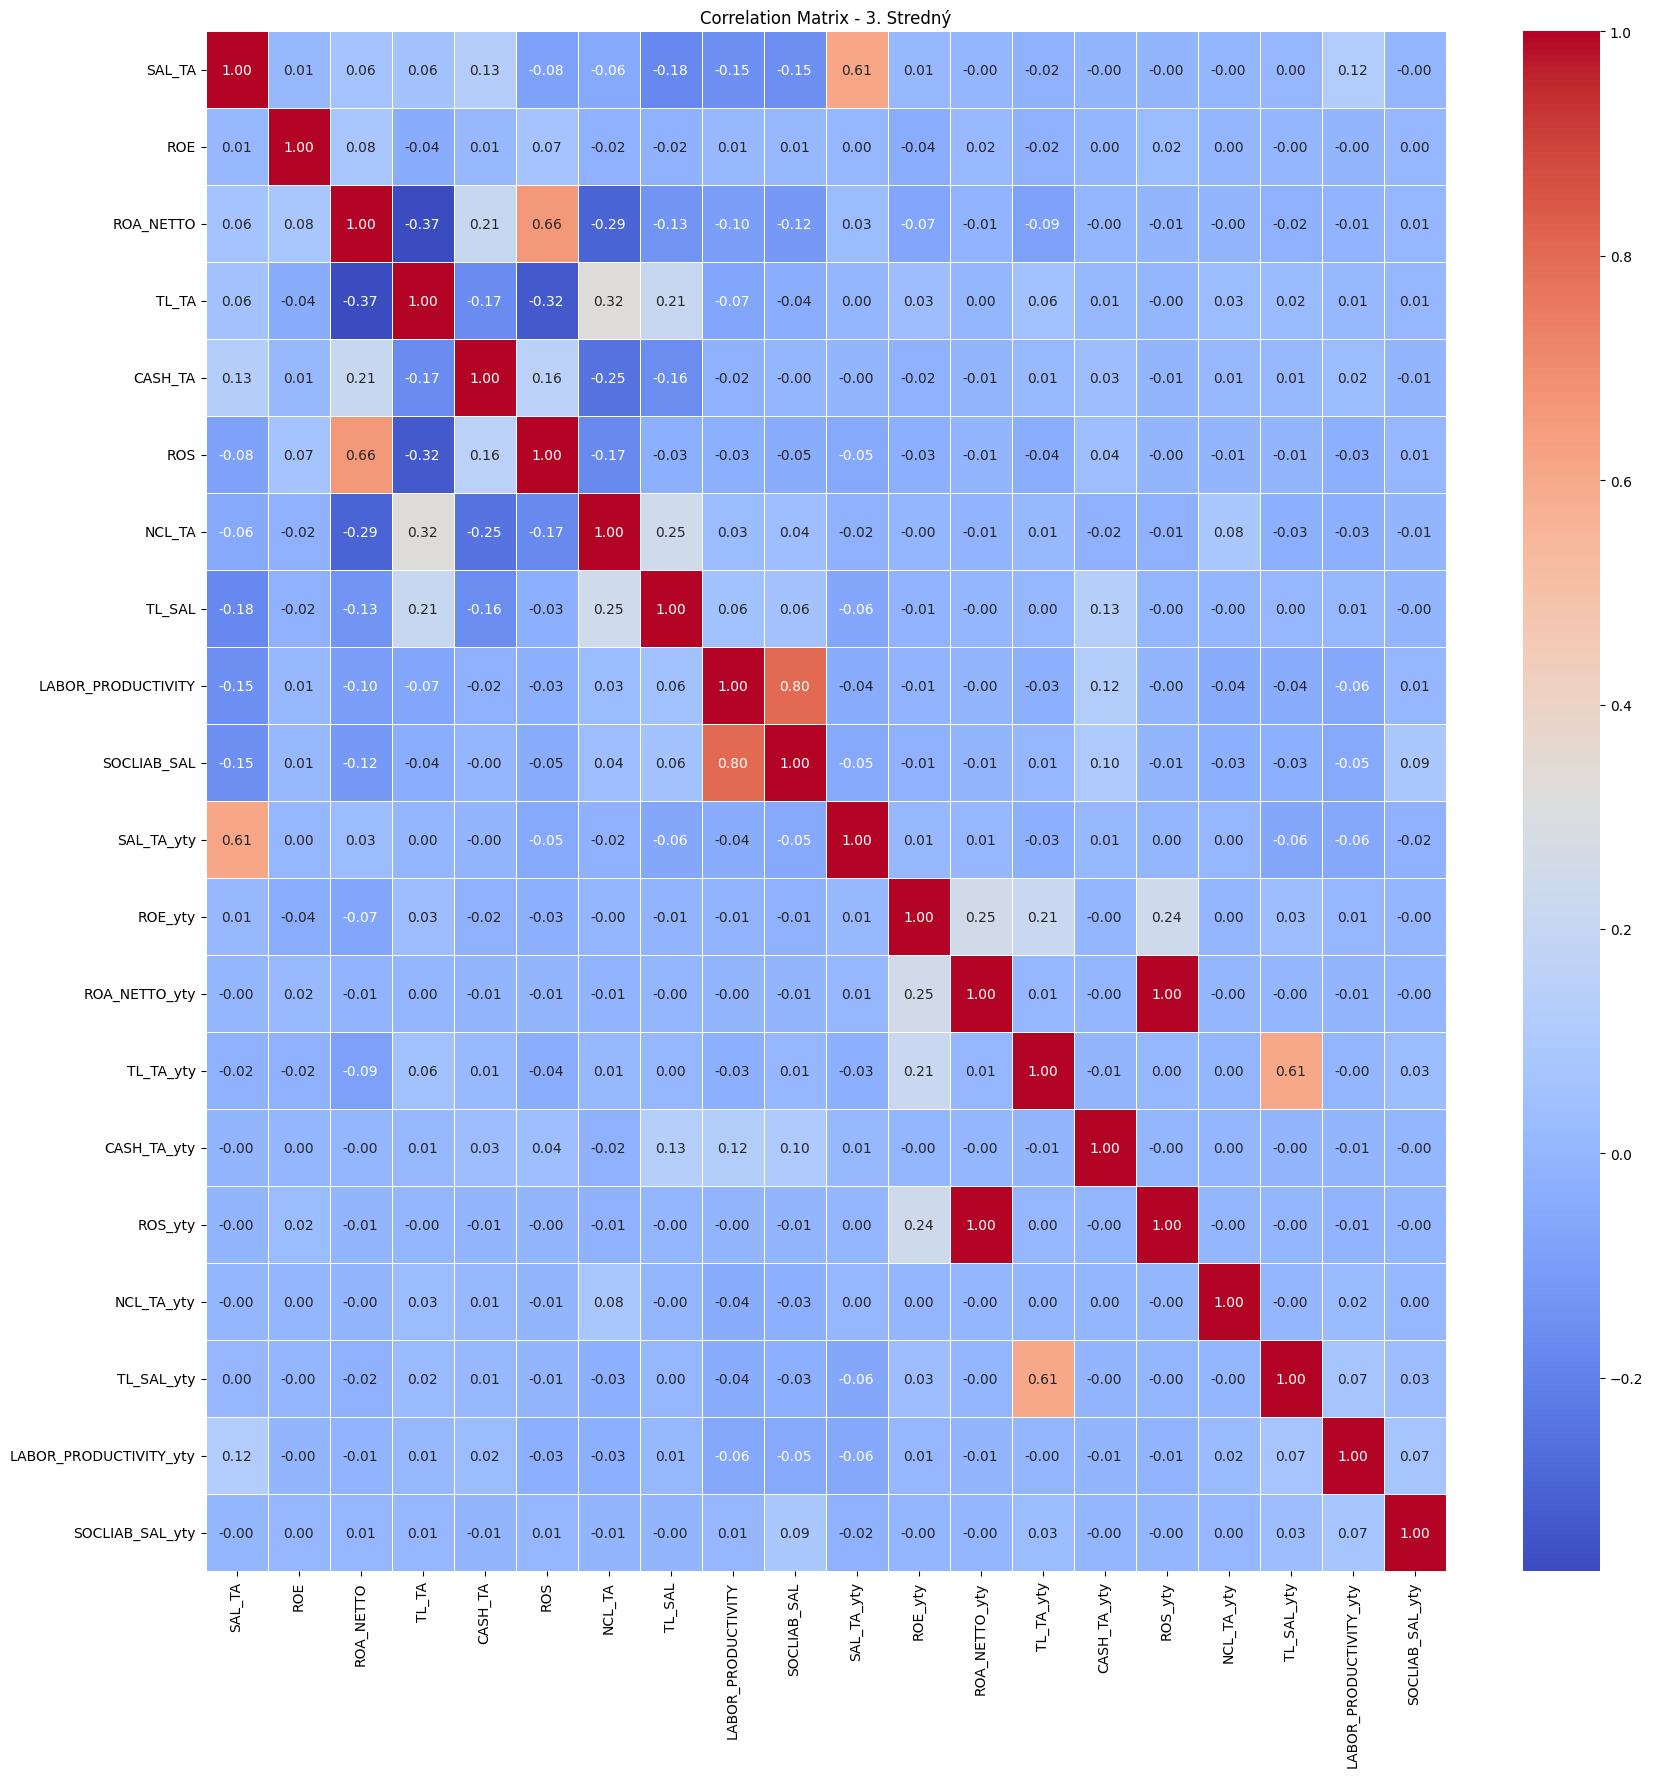

In [ ]:
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = sample.query('is_outlier == False')[predictors_extended].corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title(f'Correlation Matrix - {sal_class}')
plt.show()

In [ ]:
import pandas as pd
import statsmodels.api as sm

def calculate_vif(data):
    # Add a constant term to the independent variables matrix
    X = sm.add_constant(data)

    # Compute VIF for each feature
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [1 / (1 - sm.OLS(X[col], X.drop(columns=[col])).fit().rsquared) for col in X.columns]
    vif_data['VIF'] = vif_data['VIF'].apply(lambda x: round(x, 2))

    return vif_data



vif_result = calculate_vif(pd.DataFrame(fill_missing_values_mean(sample[predictors_extended]), columns=predictors_extended))
display(vif_result)


,Feature,VIF
0,const,8.83
1,SAL_TA,3.64
2,ROE,1.02
3,ROA_NETTO,29.11
4,TL_TA,5.74
5,CASH_TA,1.12
6,ROS,2.26
7,NCL_TA,6.55
8,TL_SAL,1.17
9,LABOR_PRODUCTIVITY,2.90


## Models

### Logistic Regression

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_validate
import seaborn as sns

from imblearn.pipeline import Pipeline

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score


from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
# Generating some sample data with imbalanced classes

X =  fill_missing_values_mean(sample.query('is_outlier == False')[predictors_extended].values)
y =  sample.query('is_outlier == False')['RUZ_indirect_criterion_2y_off'].fillna(1).values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating SMOTE and RandomUnderSampler objects
smote = SMOTE(sampling_strategy='auto', random_state=42)
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression


logistic_model = LogisticRegression()

# Creating a pipeline to combine sampling and modeling
pipeline = Pipeline([('SMOTE', smote), ('RUS', rus), ('Logistic Regression', logistic_model)])

# Define scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'balanced_accuracy']

# Perform cross-validation
cv_results = cross_validate(pipeline, X, y, cv=5, scoring=scoring)

# Print mean and standard deviation of evaluation metrics
print("Cross-Validation Results:")
print("Accuracy: {:.2f} +/- {:.2f}".format(np.mean(cv_results['test_accuracy']), np.std(cv_results['test_accuracy'])))
print("Precision: {:.2f} +/- {:.2f}".format(np.mean(cv_results['test_precision']), np.std(cv_results['test_precision'])))
print("Recall: {:.2f} +/- {:.2f}".format(np.mean(cv_results['test_recall']), np.std(cv_results['test_recall'])))
print("F1 Score: {:.2f} +/- {:.2f}".format(np.mean(cv_results['test_f1']), np.std(cv_results['test_f1'])))
print("ROC AUC Score: {:.2f} +/- {:.2f}".format(np.mean(cv_results['test_roc_auc']), np.std(cv_results['test_roc_auc'])))
print("Balanced Accuracy: {:.2f} +/- {:.2f}".format(np.mean(cv_results['test_balanced_accuracy']), np.std(cv_results['test_balanced_accuracy'])))

# Plotting confusion matrix for one of the folds
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y, pipeline.predict(X)), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

c:\Users\matus.rohal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\matus.rohal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-

Cross-Validation Results:
Accuracy: 0.65 +/- 0.09
Precision: 0.97 +/- 0.01
Recall: 0.65 +/- 0.11
F1 Score: 0.77 +/- 0.07
ROC AUC Score: 0.65 +/- 0.04
Balanced Accuracy: 0.61 +/- 0.04


c:\Users\matus.rohal\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<Figure size 800x600 with 0 Axes>

### Decision Tree

Cross-Validation Results:
Accuracy: 0.80 +/- 0.02
Precision: 0.95 +/- 0.00
Recall: 0.84 +/- 0.02
F1 Score: 0.89 +/- 0.02
ROC AUC Score: 0.48 +/- 0.02
Balanced Accuracy: 0.48 +/- 0.02


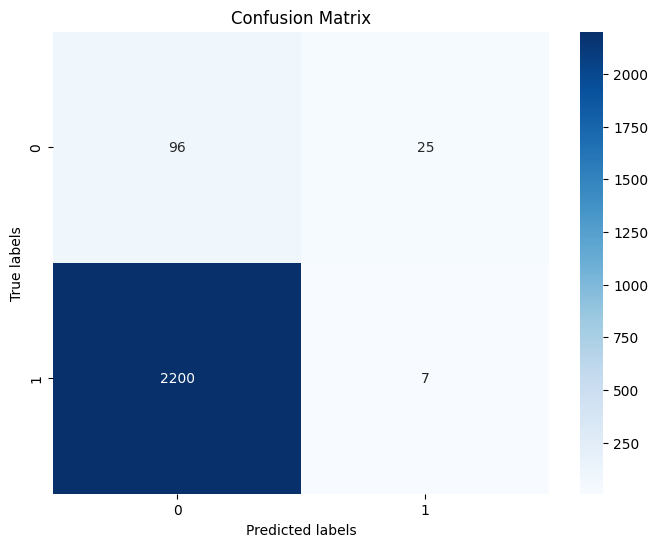

In [ ]:

from sklearn.tree import DecisionTreeClassifier

logistic_model = LogisticRegression()

# Creating a pipeline to combine sampling and modeling
pipeline = Pipeline([('SMOTE', smote), ('RUS', rus), ('Decision Tree', tree_model)])

# Define scoring metrics
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc', 'balanced_accuracy']

# Perform cross-validation
cv_results = cross_validate(pipeline, X, y, cv=5, scoring=scoring)

# Print mean and standard deviation of evaluation metrics
print("Cross-Validation Results:")
print("Accuracy: {:.2f} +/- {:.2f}".format(np.mean(cv_results['test_accuracy']), np.std(cv_results['test_accuracy'])))
print("Precision: {:.2f} +/- {:.2f}".format(np.mean(cv_results['test_precision']), np.std(cv_results['test_precision'])))
print("Recall: {:.2f} +/- {:.2f}".format(np.mean(cv_results['test_recall']), np.std(cv_results['test_recall'])))
print("F1 Score: {:.2f} +/- {:.2f}".format(np.mean(cv_results['test_f1']), np.std(cv_results['test_f1'])))
print("ROC AUC Score: {:.2f} +/- {:.2f}".format(np.mean(cv_results['test_roc_auc']), np.std(cv_results['test_roc_auc'])))
print("Balanced Accuracy: {:.2f} +/- {:.2f}".format(np.mean(cv_results['test_balanced_accuracy']), np.std(cv_results['test_balanced_accuracy'])))

# Plotting confusion matrix for one of the folds
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y, pipeline.predict(X)), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

### Support Vector Machine

Accuracy: 0.5286343612334802
Precision: 0.020491803278688523
Recall: 0.7407407407407407
F1 Score: 0.03988035892323031
ROC AUC Score: 0.6332671957671958
Balanced Accuracy: 0.6332671957671958


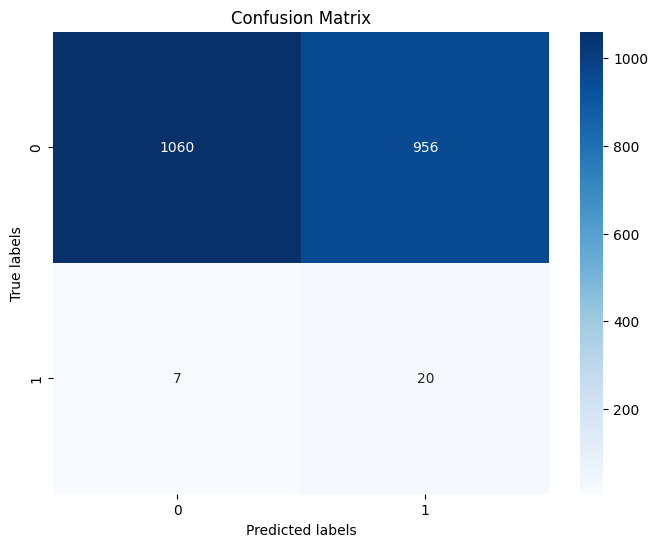

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Generating some sample data with imbalanced classes

X =  fill_missing_values_mean(financial_ratios_table_2017.query('is_outlier == False')[['SAL_TA', 'ROE', 'ROA_NETTO', 'TL_TA', 'CASH_TA', 'ROS', 'NCL_TA', 'TL_SAL', 'LABOR_PRODUCTIVITY', 'SOCLIAB_SAL']].values)
y =  financial_ratios_table_2017.query('is_outlier == False')['direct_criterion_2y_off'].fillna(1).values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = X, X, y, y

# Creating SMOTE and RandomUnderSampler objects
smote = SMOTE(sampling_strategy='auto', random_state=42)
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Creating SVM classifier
svm_model = SVC(kernel='linear')  # You can choose different kernels such as 'linear', 'rbf', 'poly', etc.

# Creating a pipeline to combine sampling and modeling
pipeline = Pipeline([('SMOTE', smote), ('RUS', rus), ('SVM', svm_model)])

# Fitting the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predicting on the testing set
y_pred = pipeline.predict(X_test)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

# Print all evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Balanced Accuracy:", balanced_accuracy)

# Generating and plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


### Neural Net

Shape of X_train_resampled: (4032, 10)
64/64 [==============================] - 0s 1ms/step
Accuracy: 0.671071953010279
Precision: 0.029197080291970802
Recall: 0.7407407407407407
F1 Score: 0.056179775280898875
ROC AUC Score: 0.7054398148148148
Balanced Accuracy: 0.7054398148148148


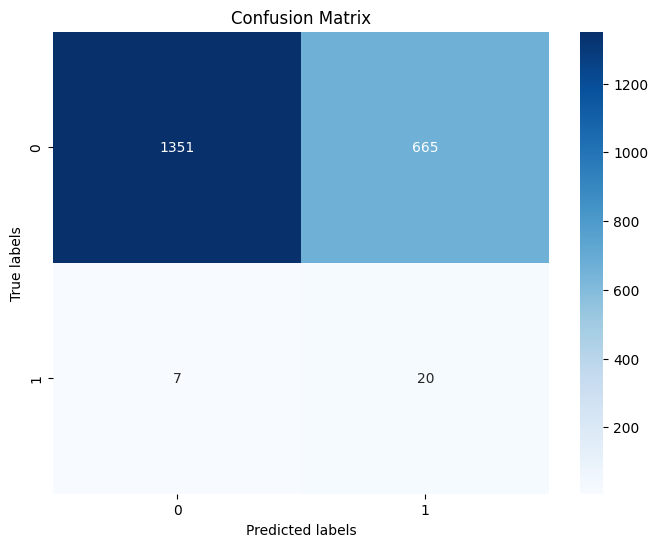

In [ ]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, balanced_accuracy_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Dense

# Generating some sample data with imbalanced classes

X =  fill_missing_values_mean(financial_ratios_table_2017.query('is_outlier == False')[['SAL_TA', 'ROE', 'ROA_NETTO', 'TL_TA', 'CASH_TA', 'ROS', 'NCL_TA', 'TL_SAL', 'LABOR_PRODUCTIVITY', 'SOCLIAB_SAL']].values)
y =  financial_ratios_table_2017.query('is_outlier == False')['direct_criterion_2y_off'].fillna(1).values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = X, X, y, y

# Creating SMOTE and RandomUnderSampler objects
smote = SMOTE(sampling_strategy='auto', random_state=42)
rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)

# Reshape y_train to match the expected shape for Keras
y_train = y_train.reshape(-1, 1)


# Creating a neural network classifier
model = Sequential()
model.add(Dense(10, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Creating a pipeline to combine sampling and modeling
pipeline = Pipeline([('SMOTE', smote), ('RUS', rus)])

# Fitting the pipeline on the training data
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

# Check the shape of X_train_resampled
print("Shape of X_train_resampled:", X_train_resampled.shape)

# Creating a neural network classifier
model = Sequential()
# Adjust the input shape based on the actual number of features in X_train_resampled
model.add(Dense(10, input_dim=X_train_resampled.shape[1], activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training the neural network on the resampled data
model.fit(X_train_resampled, y_train_resampled, epochs=50, batch_size=10, verbose=0)

# Predicting on the testing set
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Calculating evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
balanced_accuracy = balanced_accuracy_score(y_test, y_pred)


# Print all evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Balanced Accuracy:", balanced_accuracy)

# Generating and plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()